<a href="https://colab.research.google.com/github/jigimmie/Aiffel_jigimmie/blob/main/_mainquest03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Using Colab cache for faster access to the 'online-retail' dataset.
Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# 주문 가격 피쳐 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [ ]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipython-input-3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [ ]:
sample_df = df.sample(n=1000, random_state=0)

In [ ]:
sample_df['TotalPrice'].describe() #랜덤추출한 샘플의 평균,std

,TotalPrice
count,1000.000000
mean,15.780230
std,53.343445
min,-1121.180000
25%,3.750000
50%,8.625000
75%,17.085000
max,622.500000


In [ ]:
df['TotalPrice'].describe() #원래 데이터 셋의 평균, 표준편차

,TotalPrice
count,541909.000000
mean,17.987795
std,378.810824
min,-168469.600000
25%,3.400000
50%,9.750000
75%,17.400000
max,168469.600000


중심극한정리에 따르면 모집단의 TotalPrice의 분포와 상관없이, 충분히 큰 표본크기로 표본을 추출한다면 그 표본의 분포가 모평균을 중심으로 하는 정규분포에 가까워진다. 이 경우 표본의 크기가 1000으로 충분히 크기에 이 표본의 평균값(15.7)은 모집단의 평균값(17.9)에 가깝게 수렴하는 것을 볼 수 있다.

## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [ ]:
df.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)
#United Kingdom과 Germany가 1,2등

,InvoiceNo
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


In [ ]:
#Uk와 Germany의 TotalPrice의 독립표본 t검정
group_a = df[df['Country']=='United Kingdom']['TotalPrice']
group_b =  df[df['Country']=='Germany']['TotalPrice']

In [ ]:
import scipy.stats as stats

In [ ]:

t_stat_lib, p_val_lib = stats.ttest_ind(group_a, group_b, equal_var=True)
print("--- SciPy 라이브러리 검증 결과  ---")
print(f"t-통계량 (라이브러리): {t_stat_lib:.4f}")
print(f"p-값 (라이브러리): {p_val_lib:.4f}")

--- SciPy 라이브러리 검증 결과  ---
t-통계량 (라이브러리): -1.6839
p-값 (라이브러리): 0.0922


t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

1. t 통계량: -1.6
t값이 음수라는 것은, 두번째 집단의 평균이 첫번째 집단보다 크다는 것을 의미. 즉 독일의 평균이 영국의 평균보다 크다.(totalprice)
그러나 통계학에서 일반적으로 '유의미한 차이'가 있다고 보는 수치는 절댓값이 1.96보다 클때로, 이 경우는 우연히 발생했을 가능성을 배제하기 어렵고 유의미한 차이가 있다고 보기 어렵다.

2) p-value: 0.092
p-value 또한 0.05보다 크기에 귀무가설(두 집단의 total price 차이는 없다)를 기각하기 어렵다.

1종 오류: 가짜 양성.
두 평균의 차이가 없는데 차이가 있다고 결론 내리는 것. -> 이 경우에는 차이가 없다고 결론 냈으니 1종 오류의 가능성은 없음.

2종 오류: 가짜 음성
실제로는 평균 차이가 있는데 없다고 결론 내리는 것.
이 경우에는 p value가 0.05보다 크니까 귀무가설을 채택한다고 결론을 내릴수 있지만, t통계량이 -1.6으로 0.05일때의 t값(-1.96)과 가까움. 따라서 2종오류가 있을 가능성을 고려해야 함.

## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [ ]:
#주중
week = df[df['DayOfWeek']<=4]['UnitPrice']
week.describe()

,UnitPrice
count,477534.000000
mean,4.843425
std,103.032058
min,-11062.060000
25%,1.250000
50%,2.100000
75%,4.130000
max,38970.000000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

{'whiskers': [<matplotlib.lines.Line2D at 0x7ddf6c90db20>,
 'caps': [<matplotlib.lines.Line2D at 0x7ddf6c90e0c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ddf6c90d880>],
 'medians': [<matplotlib.lines.Line2D at 0x7ddf6c90e660>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ddf6c90e990>],
 'means': []}

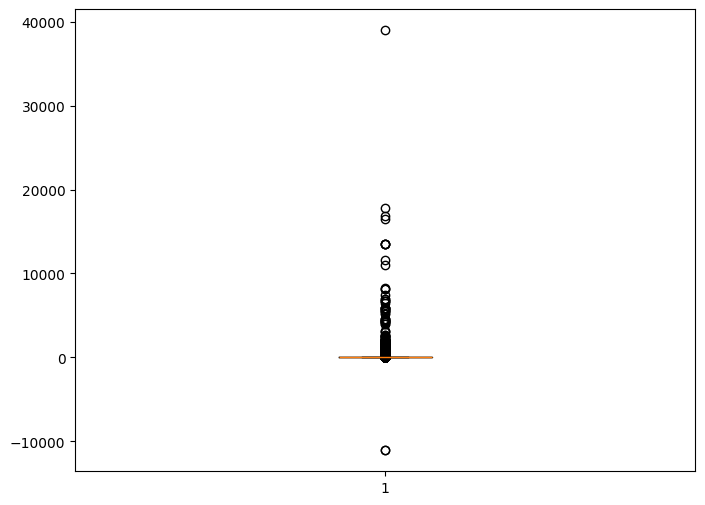

In [ ]:
plt.figure(figsize=(8,6))
plt.boxplot(week)

In [ ]:
week

,UnitPrice
0,2.55
1,3.39
2,2.75
3,3.39
4,3.39
...,...
541904,0.85
541905,2.10
541906,4.15
541907,4.15


In [ ]:
#극단값이 많고 데이터수가 많아 연산에 시간이 오래걸리고 분포도 잘 보이지 않아서
#극단값 없이 보기 위해 이상치를 제거한 새로운 변수를 만들었습니다.
week_df = week[(week > 0) & (week < 10)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7ddf6c8b54f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ddf6c8b5af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ddf6c8b5280>],
 'medians': [<matplotlib.lines.Line2D at 0x7ddf6c8b60c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ddf6c8b6300>],
 'means': []}

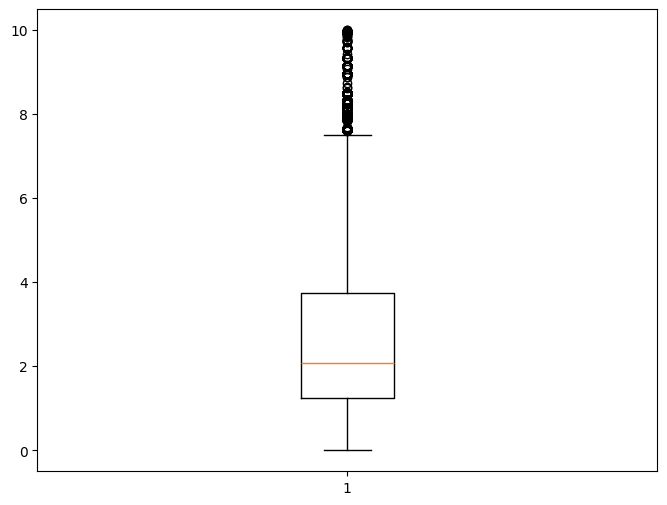

In [ ]:
plt.figure(figsize=(8,6))
plt.boxplot(week_df)

<Axes: xlabel='UnitPrice', ylabel='Count'>

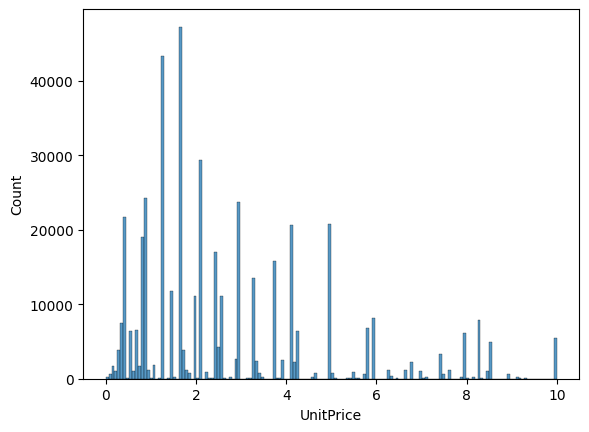

In [ ]:
sns.histplot(week_df)

In [ ]:
#주말
weekend = df[df['DayOfWeek']>=5]['UnitPrice']

In [ ]:
#주말
weekend.describe()

,UnitPrice
count,64375.000000
mean,2.887824
std,7.959497
min,0.000000
25%,1.250000
50%,1.850000
75%,3.750000
max,1236.750000


{'whiskers': [<matplotlib.lines.Line2D at 0x7ddf6df3bf80>,
 'caps': [<matplotlib.lines.Line2D at 0x7ddf6de7c590>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ddf6df3bcb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ddf6de7ca40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ddf6de7cd40>],
 'means': []}

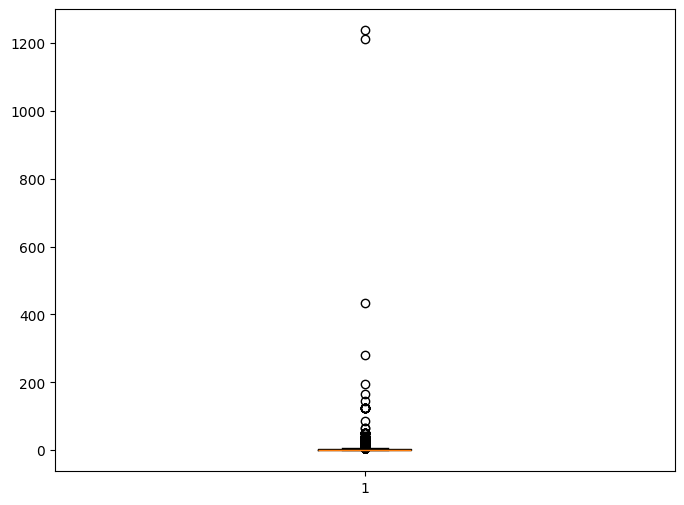

In [ ]:
plt.figure(figsize=(8,6))
plt.boxplot(weekend)

In [ ]:
#주말도 마찬가지로 분포를 더 잘 보기 위해 이상치를 제거한 새로운 변수를 만들었습니다
weekend_df = weekend[(weekend > 0) & (weekend < 10)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7ddf6deb7710>,
 'caps': [<matplotlib.lines.Line2D at 0x7ddf6deb7d40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ddf6deb7260>],
 'medians': [<matplotlib.lines.Line2D at 0x7ddf6dee01d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ddf6dee0500>],
 'means': []}

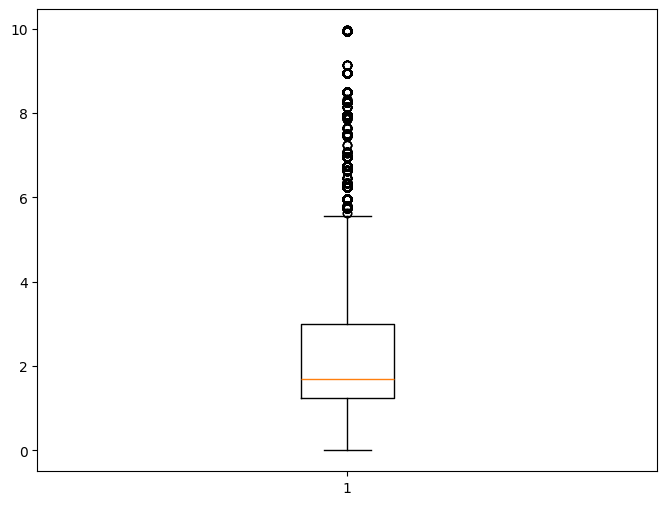

In [ ]:
plt.figure(figsize=(8,6))
plt.boxplot(weekend_df)

<Axes: xlabel='UnitPrice', ylabel='Count'>

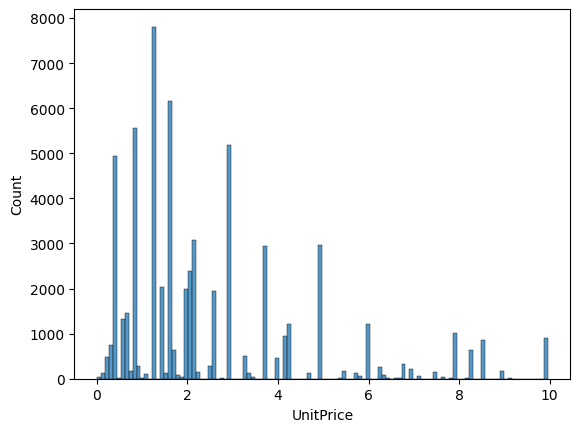

In [ ]:
sns.histplot(weekend_df)

평일의 50% 분포 1.25 - 4.1
주말의 50% 분포 1.25-3.75
로 비슷함.
이상치가 많아 중앙값을 보자면
평일 2.1, 주말 1.8
로 전체적으로 분포가 비슷하지만 평일이 주말에 비해 50% 지점, 75%지점 둘다 정말 미세하게 높다. 그러나 거의 0.3, 0.4정도로 차이가 거의 없다고 봐도 무방할 것 같다.

## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [ ]:
df.isna().mean() #필요한 피처에 결측치는 없음

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.002683
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,0.249267
Country,0.000000
TotalPrice,0.000000
DayOfWeek,0.000000


In [ ]:
df.describe()
#Quantity와 Unitprice에 음수값이 있는 것 같다.
#Quantity가 음수인 데이터는 반품 데이터로 추정됨.(invoice가 C로 시작)
#Unitprice가 음수인 데이터는 description에 adjust bad debt -> 외상으로 판 후 받지 못할 것으로 예상되는 금액
#그렇기에 이 두 데이터는 판매량 예측에는 관련 없으니 제거하도록 하겠음.


,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,DayOfWeek,InvoiceMonth
count,541909.000000,541909,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,17.987795,2.431277,7.553128
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,-168469.600000,0.000000,1.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,3.400000,1.000000,5.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,9.750000,2.000000,8.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,17.400000,4.000000,11.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000,6.000000,12.000000
std,218.081158,NaN,96.759853,1713.600303,378.810824,1.844709,3.509055


In [ ]:
df_n = df[(df['Quantity']>0)&(df['UnitPrice']>0)]

In [ ]:
country = df_n.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)

In [ ]:
country.apply(lambda x:x/530104)
#UK가 91%로 압도적으로 높음. 그러나 UK만 살려두고 나머지는 다 others로 바꾸기엔
#country 컬럼을 x로 넣는 의미가 없는 것 같아 EIRE까지만 살려둠.

,InvoiceNo
Country,
United Kingdom,0.915147
Germany,0.017053
France,0.015859
EIRE,0.014884
Spain,0.004686
Netherlands,0.004450
Belgium,0.003831
Switzerland,0.003709
Portugal,0.002832


In [ ]:
# 유지하고 싶은 국가 리스트 정의
target_countries = ['United Kingdom', 'Germany', 'France', 'EIRE']

# 리스트에 없으면 'Others'로 변경
df_n['Country'] = df_n['Country'].apply(lambda x: x if x in target_countries else 'Others')

# 결과 확인
print(df_n['Country'].value_counts())

Country
United Kingdom    485123
Others             19644
Germany             9040
France              8407
EIRE                7890
Name: count, dtype: int64


/tmp/ipython-input-2740359393.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['Country'] = df_n['Country'].apply(lambda x: x if x in target_countries else 'Others')


Mean Squared Error (MSE): 1525.76
R-squared (R²): 0.01


,Feature,Coefficient
0,UnitPrice_Log,-0.614098
1,DayOfWeek,-0.012281
2,InvoiceMonth,-0.005053
3,Country_France,-0.146616
4,Country_Germany,-0.093665
5,Country_Others,0.118962
6,Country_United Kingdom,-0.763685


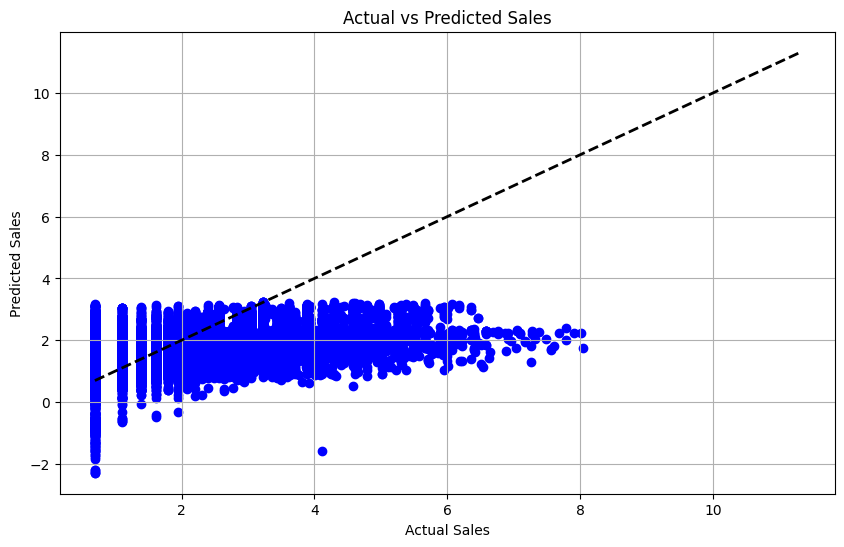

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

#원핫인코딩

df_encoded= pd.get_dummies(df_n, columns=['Country'], drop_first=True, dtype=int)
country_cols = [col for col in df_encoded.columns if 'Country_' in col]

df_encoded['UnitPrice_Log'] = np.log1p(df_encoded['UnitPrice'])
# 특성 및 타겟 변수 설정
features = ['UnitPrice_Log', 'DayOfWeek', 'InvoiceMonth'] + country_cols

X = df_encoded[features]
y = np.log1p(df_encoded['Quantity'])

# 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

y_pred_original = np.expm1(y_pred)
y_test_original = np.expm1(y_test)
# 모델 평가
mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# 회귀 계수 출력
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

display(coefficients)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()

결정계수는 0.01로 1%의 매우 낮은 설명력
country_others를 제외하고는 모두 quantity와 음의 관계.
country_unitedkingdom이 -0.76으로 제일 큰 설명력을 가짐.

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [ ]:
#모델 학습에 적절한 피처 설정
df_l = df[['Quantity', 'StockCode', 'InvoiceDate', 'TotalPrice', 'CustomerID', 'Country', 'DayOfWeek', 'InvoiceMonth']]

In [ ]:
#hour 피처 만들기
df_l['Hour'] = df_l['InvoiceDate'].dt.hour

/tmp/ipython-input-3441928999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l['Hour'] = df_l['InvoiceDate'].dt.hour


In [ ]:
#Quantity 피처를 사용해 IsReturn 피처 만들기
df_l['IsReturn']= df_l['Quantity'].apply(lambda x:1 if x<0 else 0)

/tmp/ipython-input-1361133406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l['IsReturn']= df_l['Quantity'].apply(lambda x:1 if x<0 else 0)


In [ ]:
#totalprice는 음수값도 가지고 있음(환불 정보 포함)
#따라서 이를 없애기 위해 절댓값 씌워줌
df_l['TotalPrice'] = df_l['TotalPrice'].abs()

/tmp/ipython-input-108284342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l['TotalPrice'] = df_l['TotalPrice'].abs()


In [ ]:
df_l['CustomerID']= df_l['CustomerID'].fillna(-1)

/tmp/ipython-input-2644061251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l['CustomerID']= df_l['CustomerID'].fillna(-1)


In [ ]:
# 유지하고 싶은 국가 리스트 정의
target_countries = ['United Kingdom', 'Germany', 'France', 'EIRE']

# 리스트에 없으면 'Others'로 변경
df_l['Country'] = df_l['Country'].apply(lambda x: x if x in target_countries else 'Others')

# 결과 확인
print(df_l['Country'].value_counts())

Country
United Kingdom    495478
Others             20183
Germany             9495
France              8557
EIRE                8196
Name: count, dtype: int64


/tmp/ipython-input-1696935982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l['Country'] = df_l['Country'].apply(lambda x: x if x in target_countries else 'Others')


In [ ]:
df_l.head()

,Quantity,StockCode,InvoiceDate,TotalPrice,CustomerID,Country,DayOfWeek,InvoiceMonth,Hour,IsReturn
0,6,85123A,2010-12-01 08:26:00,15.30,17850.0,United Kingdom,2,12,8,0
1,6,71053,2010-12-01 08:26:00,20.34,17850.0,United Kingdom,2,12,8,0
2,8,84406B,2010-12-01 08:26:00,22.00,17850.0,United Kingdom,2,12,8,0
3,6,84029G,2010-12-01 08:26:00,20.34,17850.0,United Kingdom,2,12,8,0
4,6,84029E,2010-12-01 08:26:00,20.34,17850.0,United Kingdom,2,12,8,0


In [ ]:
from sklearn.linear_model import LogisticRegression

/tmp/ipython-input-3053844404.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l['StockCode'] = df_l['StockCode'].astype(str)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLL

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.58      0.73    106257
           1       0.03      0.58      0.05      2125

    accuracy                           0.58    108382
   macro avg       0.51      0.58      0.39    108382
weighted avg       0.97      0.58      0.72    108382



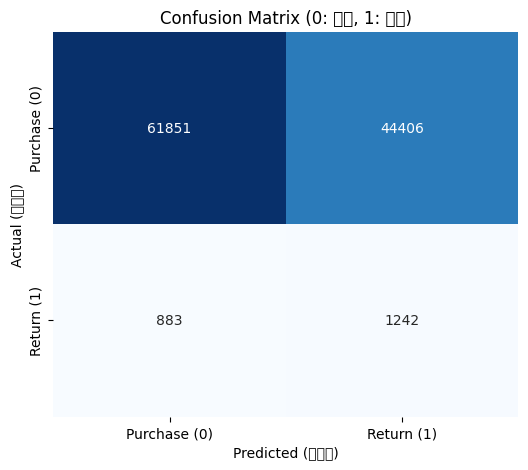

전체 정확도 (Accuracy): 0.5821
F1-Score (환불 클래스 기준): 0.0520


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# 1. [StockCode 처리] 레이블 인코딩
df_l['StockCode'] = df_l['StockCode'].astype(str)
le = LabelEncoder()
df_l['StockCode_Encoded'] = le.fit_transform(df_l['StockCode'])

#2.Country 원핫인코딩

df_l= pd.get_dummies(df_l, columns=['Country'], drop_first=True, dtype=int)
country_cols = [col for col in df_l.columns if 'Country_' in col]

#3.TotalPrice에 로그 취하기(큰 값이 너무 많음)
df_l['TotalPrice_Log'] = np.log1p(df_l['TotalPrice'])


# 독립변수(X)와 종속변수(y) 설정
# 앞서 만든 피처들을 모두 포함합니다.
features = ['Hour', 'StockCode_Encoded', 'CustomerID', 'TotalPrice_Log', 'InvoiceMonth'] +country_cols
X = df_l[features]
y = df_l['IsReturn']

#  학습셋(Train)과 테스트셋(Test) 분리
# stratify=y 옵션: 환불(1) 데이터가 적기 때문에, Train/Test 양쪽에 비율을 맞춰서 잘라줍니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. 로지스틱 회귀 모델 학습
# class_weight='balanced': 환불 데이터가 너무 적어서 모델이 "전부 환불 안 함"이라고 찍는 것을 방지합니다. (중요!)
# max_iter=1000: 데이터가 많으면 학습 횟수를 늘려줘서 에러 안 나게.
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 4. 예측 수행
y_pred = model.predict(X_test)

# 5. 모델 평가 결과 출력

# (1) 분류 리포트 (정밀도, 재현율, F1-score 한눈에 보기)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# (2) 혼동 행렬 (Confusion Matrix) 시각화
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted (예측값)')
plt.ylabel('Actual (실제값)')
plt.title('Confusion Matrix (0: 구매, 1: 환불)')
plt.xticks([0.5, 1.5], ['Purchase (0)', 'Return (1)'])
plt.yticks([0.5, 1.5], ['Purchase (0)', 'Return (1)'])
plt.show()

# (3) 핵심 지표 별도 출력
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"전체 정확도 (Accuracy): {acc:.4f}")
print(f"F1-Score (환불 클래스 기준): {f1:.4f}")



결과 해석
환불(1)의 예측성능을 보면
재현율은 58%로 실제 환불건의 58% 예측 성공.
그러나 정밀도가 0.03으로 환불 예측 중 실제 환불인 것은 3%에 불가.
따라서 조화 평균인 F-1 스코어도 매우 낮음.

confusion matrix에서도 구매건인데 환불로 예측한 건이 44406건으로 많은 것을 확인 가능.

즉 실제 환불건에 비해 지나치게 많은 경우를 환불이라고 예측하는 문제 (이는 비즈니스적 관점에서 마케팅 비용 낭비 등의 문제가 생길 수 있음)

랜덤 포레스트 학습 시작... (시간이 조금 걸릴 수 있습니다)

=== Random Forest 결과 ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    106257
           1       0.67      0.18      0.28      2125

    accuracy                           0.98    108382
   macro avg       0.83      0.59      0.64    108382
weighted avg       0.98      0.98      0.98    108382

F1-Score: 0.2799


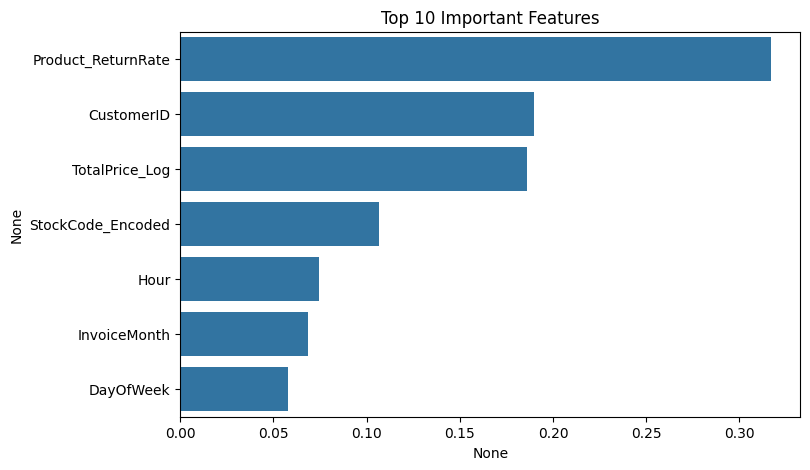

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

# 1. [안전한 피처 생성] 제품별 반품률 (Train 데이터만 사용!)
# 먼저 데이터를 나눕니다.
X = df_l.drop(columns=['IsReturn']) # 편의상 전체 컬럼 잠시 대기
y = df_l['IsReturn']

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- (Data Leakage 방지) ---

# (1) Train 데이터로만 '제품별 반품 확률' 계산
# X_train과 y_train을 잠시 합침
train_temp = X_train_raw.copy()
train_temp['IsReturn'] = y_train

# 제품별(StockCode) 반품 평균 계산
product_return_map = train_temp.groupby('StockCode')['IsReturn'].mean()

# (2) 이 지도를 Train과 Test에 각각 매핑
# Test 셋의 정답은 전혀 보지 않았으므로 안전함!
X_train_raw['Product_ReturnRate'] = X_train_raw['StockCode'].map(product_return_map).fillna(0)
X_test_raw['Product_ReturnRate'] = X_test_raw['StockCode'].map(product_return_map).fillna(0) # 신규 제품은 0 처리

# ---------------------------------------------------

# 2. 모델에 넣을 피처 선정
features = ['Hour', 'StockCode_Encoded', 'CustomerID', 'TotalPrice_Log',
            'DayOfWeek', 'InvoiceMonth', 'Product_ReturnRate']

X_train = X_train_raw[features]
X_test = X_test_raw[features]

# 3. 모델 교체: 랜덤 포레스트 (Random Forest)
# n_estimators=100: 나무 100그루 심기
# n_jobs=-1: 컴퓨터 성능 풀가동

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# 4. 예측 및 평가
y_pred = rf_model.predict(X_test)

print("\n=== Random Forest 결과 ===")
print(classification_report(y_test, y_pred))
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

# 5. 모델이 뭘 중요하게 봤는지 확인
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importance = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=importance, y=importance.index)
plt.title('Top 10 Important Features')
plt.show()

In [ ]:
#단순한 로지스틱 회귀 모형에는 한계가 있는 것 같아 랜덤 포레스트 사용.
#또한 강력한 피처인 제품별 환불비율을 구함
#(data leakage를 예방하기 위해 train set의 값만 사용해서 구함.)\
#precision 정밀도는 0.67로 올랐지만, recall(재현율)은 0.18로 매우 낮음

In [ ]:
from sklearn.metrics import classification_report, f1_score

# 1. '환불(1)'일 확률만 뽑아냅니다.
pred_proba = rf_model.predict_proba(X_test)[:, 1]

# 2. 내 맘대로 기준 정하기
# 기본값은 0.5인데, 이걸 0.3으로 낮추면 더 많이 잡아냅니다.
threshold = 0.3
y_pred_tuned = (pred_proba >= threshold).astype(int)

# 3. 결과 확인
print(f"=== 임계값 {threshold} 적용 결과 ===")
print(classification_report(y_test, y_pred_tuned))
print(f"New F1-Score: {f1_score(y_test, y_pred_tuned):.4f}")

=== 임계값 0.3 적용 결과 ===
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    106257
           1       0.60      0.31      0.41      2125

    accuracy                           0.98    108382
   macro avg       0.79      0.65      0.70    108382
weighted avg       0.98      0.98      0.98    108382

New F1-Score: 0.4052


임계값을 0.3으로 낮추니 F-1 score도 오르고 recall도 올랐습니다.
대신 precision은 조금 떨어졌지만 그에 비해 recall이 많이 올라 의미있는 시도였다고 볼 수 있을 것 같습니다.
F-1 score이 0.4로 1에 비해 0에 더 가깝지만, 환불 데이터는 사람의 마음을 다루고
사람의 마음은 비이성적임으로 예측이 쉽지 않습니다.
이외에도 xgboost 모델을 사용해보거나, 최적의 임계값을 찾는 등 다른 방법을 더 도전해볼 수 있을 것 같습니다.